# 前期工作

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# 导入数据
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
# 归一化

# 将像素的值标准化至0到1的区间内
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

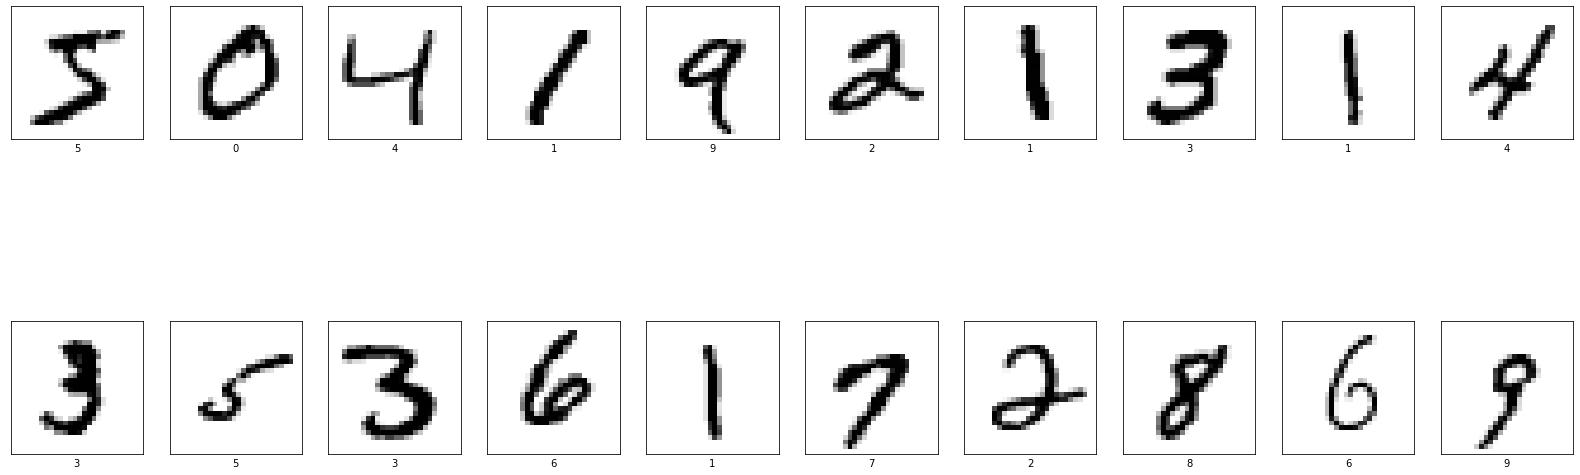

In [4]:
# 可视化图片
plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(5, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
# 调整数据到我们需要的格式
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

# 构建CNN网络模型

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 卷积层1， 卷积核3*3
    layers.MaxPooling2D((2, 2)),                                            # 池化层1， 2*2 采样
    layers.Conv2D(64, (3, 3), activation='relu'),                           # 卷积层2， 卷积核3*3
    layers.MaxPooling2D((2, 2)),                                            # 池化层2， 2*2采样

    layers.Flatten(),                                                       # Flatten层，连接卷积层与全连接层
    layers.Dense(64, activation='relu'),                                    # 全连接层，特征进一步提取
    layers.Dense(10)                                                        # 输出层，输出预期结果
])
# 打印网络结构
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

# 编译模型

In [8]:
"""
这里设置优化器、损失函数以及metrics
这三者具体介绍可参考我的博客：
https://blog.csdn.net/qq_38251616/category_10258234.html
"""
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 训练模型

In [9]:
"""
这里设置输入训练数据集（图片及标签）、验证数据集（图片及标签）以及迭代次数epochs
关于model.fit()函数的具体介绍可参考我的博客：
https://blog.csdn.net/qq_38251616/category_10258234.html
"""
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.8355 - accuracy: 0.7240 - val_loss: 0.3196 - val_accuracy: 0.9070
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2682 - accuracy: 0.9186 - val_loss: 0.1956 - val_accuracy: 0.9416
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1810 - accuracy: 0.9458 - val_loss: 0.1363 - val_accuracy: 0.9589
Epoch 4/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1351 - accuracy: 0.9592 - val_loss: 0.1060 - val_accuracy: 0.9657
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1123 - accuracy: 0.9655 - val_loss: 0.0970 - val_accuracy: 0.9695
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0991 - accuracy: 0.9698 - val_loss: 0.0852 - val_accuracy: 0.9737
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0902 - accuracy: 0.9729 - val_loss: 0.0758 -

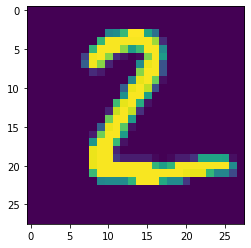

In [10]:
plt.imshow(test_images[1])

In [11]:
pre = model.predict(test_images)
pre[1]

array([-2.1010077e-01,  7.4836578e+00,  1.2081768e+01,  9.6930303e-02,
       -1.8305708e+01, -7.7905645e+00, -6.6521764e+00, -1.7099302e+01,
       -1.2237906e-02, -1.8911739e+01], dtype=float32)